# The ArcGIS API - Working With ArcGIS Online Data

The first thing we'll need to do is import the arcgis module.

In [1]:
import arcgis

After that, we'll create a "GIS" object.  This is how arcgis online tracks our user information and determines what we have access to

https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.GIS

In [ ]:
# create an input for your username
username = input("Username: ")

# create a GIS object - it will automatically ask for your password if you don't enter one
session_gis = arcgis.GIS('https://arcgis.com',username)

## Items

Once we've created a GIS object to manage our login, let's find some data that's worth looking at.

The current COVID cases by county should be pretty interesting.  After poking around ESRI's COVID Response page (https://coronavirus-resources.esri.com/), I found the following item that I've decided I want.

There are a bunch of different ways to get an item.  Here's the easiest one I know of.

https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#item

<Item title:"COVID-19 Cases by County" type:Feature Layer Collection owner:eocgis>
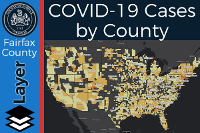

In [8]:
item_covid = arcgis.gis.Item(session_gis,'26266bbb8c1a4ab09be063c47357a1ac')
item_covid

In this case, *Item* is a **class** as defined by the ArcGIS Python API.  *item_covid* is an **object** that we've given a specific name.

Now that we've made our object, we can start looking at the different **methods** and **properties**


In [9]:
# let's look at the item's type
item_covid.type

'Feature Service'

In [10]:
# because this is a 'Feature Service', it should have at least one feature layer.
item_covid.layers

[<FeatureLayer url:"https://services1.arcgis.com/ioennV6PpG5Xodq0/arcgis/rest/services/COVID19CasesByCounty/FeatureServer/0">]

In [16]:
item_covid??

## Feature Layers

Most of the data that we're going to look at in ArcGIS Online exists in the form of **Feature Layer** objects.  These are like feature classes for desktop data in that they have tabular and spatial data.  The big difference though is that feature layers reside in an ArcGIS Server (ArcGIS Online) and are accessed through a Representative State Transfer (REST) API. 
https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#arcgis.features.FeatureLayer


Here's what our covid data looks like as a REST "endpoint"
https://services1.arcgis.com/ioennV6PpG5Xodq0/arcgis/rest/services/COVID19CasesByCounty/FeatureServer/0



In [18]:
lyr_covid = item_covid.layers[0]
lyr_covid

<FeatureLayer url:"https://services1.arcgis.com/ioennV6PpG5Xodq0/arcgis/rest/services/COVID19CasesByCounty/FeatureServer/0">

In [26]:
lyr_covid??

In [27]:
lyr_covid.properties.fields[0:5]

[{
   "name": "OBJECTID",
   "type": "esriFieldTypeOID",
   "alias": "OBJECTID",
   "sqlType": "sqlTypeOther",
   "nullable": false,
   "editable": false,
   "domain": null,
   "defaultValue": null
 }, {
   "name": "NAME",
   "type": "esriFieldTypeString",
   "alias": "County",
   "sqlType": "sqlTypeOther",
   "length": 32,
   "nullable": true,
   "editable": true,
   "domain": null,
   "defaultValue": null
 }, {
   "name": "STATE_NAME",
   "type": "esriFieldTypeString",
   "alias": "State",
   "sqlType": "sqlTypeOther",
   "length": 25,
   "nullable": true,
   "editable": true,
   "domain": null,
   "defaultValue": null
 }, {
   "name": "STATE_FIPS",
   "type": "esriFieldTypeString",
   "alias": "State FIPS",
   "sqlType": "sqlTypeOther",
   "length": 2,
   "nullable": true,
   "editable": true,
   "domain": null,
   "defaultValue": null
 }, {
   "name": "CNTY_FIPS",
   "type": "esriFieldTypeString",
   "alias": "County FIPS",
   "sqlType": "sqlTypeOther",
   "length": 3,
   "nullable

## Querying a Feature Layer

One of the most versitile methods on a feature layer is the *query* method.
https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#arcgis.features.FeatureLayer.query

This single method can let you 
- find a count of records
- summarize counts of specific fields
- filter a layer by geometry
- copy an entire dataset offline

In [29]:
query_result = lyr_covid.query(return_geometry=False)
query_result

<FeatureSet> 3137 features

### Sidebar - The FeatureSet object

The *FeatureSet* object is the default result of a query.  It consists of a list of *Features* and some metadata from the *Feature Layer* object.
https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#arcgis.features.FeatureSet

*FeatureSet* objects are the python version of a JSON/GEOJSON object.  They can be super useful for converting the data in a feature layer into useful exports like a feature class or GEOJSON for non-ESRI applications.

### End Sidebar

### Feature Count

Returning just the count of the features in a layer can be incredibly useful.  It speeds up the processing time considerably.  Rather than the server returning an entire *FeatureSet*, the server can just tell you how many features meet the criteria you care about.

In [32]:
lyr_covid.query(return_count_only=True)

3137

### Forming a query in Python

If you're familiar with using "Select By Attributes" in ArcMap or ArcGIS Pro, you'll be familiar with this

https://pro.arcgis.com/en/pro-app/arcpy/get-started/specifying-a-query.htm

If you're not familiar with ESRI software and you are familiar with SQL, a query (or where-statement) in ESRI products usually refers to the **WHERE** portion of a SQL statement.  

If you're not familiar with either, these things usually take the following form:
"FIELD = NUMBER"
or
"FIELD = 'Text Value'"

Let's try to get some specific information from our query.

In [34]:
lyr_covid.query(where = "NAME = 'Alameda'",
               return_count_only = True)

1

Try to find how many counties have more than 100 confirmed cases.  

Hint:  There is a field called "Confirmed"

In [ ]:
# insert your code here



<details>
<summary>Click here for the answer</summary>

<code>
   lyr_covid.query(where = "Confirmed > 100",
                return_count_only=True)
</code>

</details>

### Back to FeatureSets

Back to the *FeatureSet* object.  Let's have a look at what a *Feature* looks like.

In [45]:
fset_alameda = lyr_covid.query(where = "NAME = 'Alameda'",
                               return_geometry=False)

In [51]:
feature_alameda = fset_alameda.features[0]

In [54]:
feature_alameda

{"attributes": {"OBJECTID": 185, "NAME": "Alameda", "STATE_NAME": "California", "STATE_FIPS": "06", "CNTY_FIPS": "001", "FIPS": "06001", "SQMI": 744.02994, "POP2000": 1443741, "populationtotals_totpop_cy": 1636500, "populationtotals_popdens_cy": 2199.5, "Province_State": "California", "Country_Region": "US", "Last_Update": 1586808834000, "Latitude": 37.64629437, "Longitude": -121.8929271, "Confirmed": 886, "Recovered": 0, "Deaths": 23, "Active": 863, "Admin2": "Alameda", "Combined_Key": "Alameda, California, US", "Incident_Rate": 53.0117050562756, "People_Tested": null, "Shape__Area": 0.196732581790457, "Shape__Length": 3.73899077221077}}

In [55]:
feature_alameda.get_value('Confirmed')

886

#### If we have time...
# DataFrames

In [60]:
sdf_california = lyr_covid.query(where = "STATE_NAME = '{}'".format("California"),
                                 return_geometry = False,
                                 out_fields = "NAME, CONFIRMED, DEATHS, ACTIVE, RECOVERED",
                                 as_df = True)

In [61]:
sdf_california.head()

,OBJECTID,NAME,Confirmed,Deaths,Active,Recovered
0,185,Alameda,886,23,863,0
1,186,Alpine,2,0,2,0
2,187,Amador,7,0,7,0
3,188,Butte,14,0,14,0
4,189,Calaveras,8,0,8,0
